**<a href="https://www.youtube.com/watch?v=EfgFeqc0H6M">Семинар</a>**<br>


# Введение в PyTorch

## PyTorch



PyTorch — это один из самых популярных на сегодняшний день фреймворков для глубокого обучения. "Популярный" в том плане, что на сегодняшний день большая часть кода, связанная с нейросетями, пишется на PyTorch. Таким популярным этот фреймворк сделало то, что с PyTorch очень удобно работать. Как мы увидим далее, работа с PyTorch очень похожа на работу с Numpy. Также у PyTorch очень удобные и информативные [документация](https://pytorch.org/docs/stable/index.html) и [туториалы](https://pytorch.org/tutorials/).

Небольшой экскурс по фреймворкам для глубокого обучения:

- **Caffee, Theano, Lasagne** — уже практически не используются;
- **Tensorflow** — фреймворк от Google, который был популярен до 2017-2018 года перед появлением PyTorch. В то время большинство кода, связанного с нейросетями, писалась на нем. Однако он был довольно сложен, поэтому PyTorch быстро перехватил лидерство.

    У Tensorflow есть также "обертка" Keras, которая позволяет более просто работать с нейросетями. Однако Keras менее гибок, чем PyTorch, поэтому не может полноценно его заменить.

    Также в 2019 году вышел Tensorflow 2.0, в котором работа с нейросетями была сильно упрощена. Но к тому моменту рынок уже захватил PyTorch, поэтому Tensorflow 2.0 популярен так и не стал.

- **PyTorch**;
- **JAX** — новый фреймворк от Google, призванный заменить Tensorflow.

### torch.Tensor

Базовой единицей фреймворка является структура, которая называется `torch.Tensor`. Tensor - это аналог `numpy.array`, многие методы работы с `torch.Tensor` в точности повторяют методы `numpy array`.

Тензор — это тот тип данных, с которыми работают все нейросети в PyTorch. Матрицы весов слоев сети — это тензоры. Данные, которые мы подаем на вход сети тоже обязательно должны быть приведены к типу `torch.Tensor`. Ну и выход сети, разумеется, тоже будет иметь тип `torch.Tensor`.

Импортируем библиотеку и рассмотрим типичные способы создания тензоров.

In [1]:
import torch

1. Тензоры можно создавать из листов, массивов и других контейнеров Python.

In [2]:
x_list = [1., 2., 3.]
x_tensor = torch.tensor(x_list)
x_tensor

tensor([1., 2., 3.])

2. Тензоры можно создавать при помощи инициализирующих функций, как в `numpy`.

In [3]:
# тензор из нулей заданного размера
zeros_tensor = torch.zeros(2, 3)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [4]:
# тензор из единиц заданного размера
ones_tensor = torch.ones(2, 3)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [5]:
# тензор — единичная матрица заданного размера
eye_tensor = torch.eye(2, 6)
eye_tensor

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]])

In [6]:
# тензор — единичная матрица заданного размера
eye_tensor = torch.eye(6)
eye_tensor

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

3. Вообще практически все методы, которые есть у Numpy массивов, есть и у torch.Tensor. С тензорами также можно производить операции:

In [7]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

y_tensor = torch.tensor([
    [-10, 3],
    [5, -4]
])

In [8]:
x_tensor + y_tensor

tensor([[-9,  5],
        [ 8,  0]])

In [9]:
x_tensor * y_tensor

tensor([[-10,   6],
        [ 15, -16]])

In [10]:
# матричное умножение
x_tensor @ y_tensor

tensor([[  0,  -5],
        [-10,  -7]])

In [11]:
# аналог np.concatenate([x_tensor, y_tensor], axis=1)
torch.cat([x_tensor, y_tensor], dim=0)

tensor([[  1,   2],
        [  3,   4],
        [-10,   3],
        [  5,  -4]])

In [12]:
torch.cat([x_tensor, y_tensor], dim=1)

tensor([[  1,   2, -10,   3],
        [  3,   4,   5,  -4]])

4. Тензоры можно переводить обратно в формат Numpy или питоновских значений

In [13]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_numpy = x_tensor.numpy()
x_numpy

array([[1, 2],
       [3, 4]])

In [14]:
# многомерный тензор
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_tensor.tolist()

[[1, 2], [3, 4]]

In [15]:
# одномерный тензор
x_tensor = torch.tensor([3])

x_tensor.item()

3

## Нейронная сеть на Pytorch

Давайте научимся создавать полносвязную нейросеть на Pytorch.

Нейронные сети в Pytorch создаются по типу конструктора: есть набор стандартных блоков из которых мы можем собрать итоговую модель. Простейшие из этих блоков — линейные слои и функции активации.



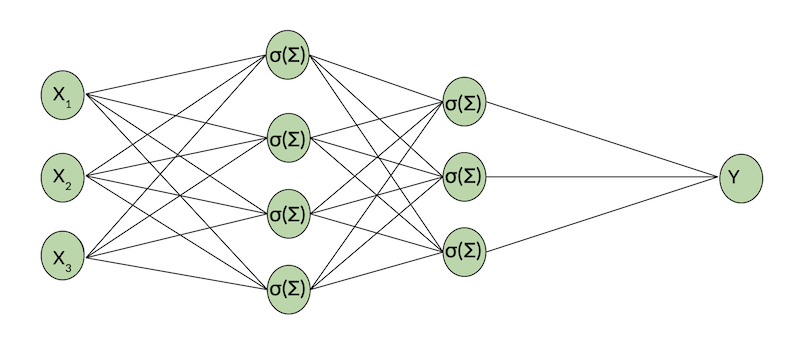

<a href="https://drive.google.com/uc?id=1WhVfzkArowhU623xjSjCE3XM6nGyBVSf">Image link</a>
<!-- <img src='https://drive.google.com/uc?id=1WhVfzkArowhU623xjSjCE3XM6nGyBVSf'/> -->
<!-- <img src="./img/fc.png"/> -->

Слой, представляющий из себя линейное преобразование задаётся при помощи класса `torch.nn.Linear`. Давайте создадим слой с 5 входными и 3 выходными нейронами.

In [16]:
# модуль, в котором определены все классы слоев сетей и функций активации
import torch.nn as nn

In [17]:
n = 5
m = 3

# аргумент bias принимает значения True и False и определяет, будет ли в слое
# применяться bias. Если bias=False, вектор байеса равен нулю
linear_layer = nn.Linear(n, m, bias=True)

In [18]:
linear_layer

Linear(in_features=5, out_features=3, bias=True)

In [19]:
linear_layer.weight

Parameter containing:
tensor([[-0.1610, -0.1448, -0.0233, -0.3307,  0.1397],
        [-0.3542, -0.1507, -0.0902,  0.1509, -0.2204],
        [-0.2681,  0.0611, -0.1441,  0.3616,  0.2942]], requires_grad=True)

Далее — функция активации. Многие известные функции активации реализованы в модуле `nn` и продублированы в модуле `nn.functional`. Выберем какую-нибудь из них, например, гиперболический тангенс (tanh).

In [20]:
# Можно использовать такой вариант:

# import torch.nn.functional as F
# activation = F.tanh

# или такой вариант:
activation = nn.Tanh()

In [21]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])
activation(x_tensor)

tensor([[0.7616, 0.9640],
        [0.9951, 0.9993]])

Теперь проход некоторого тензора с данными через такой полносвязный слой будет задан при помощи последовательности команд:

In [22]:
random_input = torch.rand(5)

x = linear_layer(random_input)
output = activation(x)
output

tensor([-0.3428, -0.3874, -0.3958], grad_fn=<TanhBackward0>)

Обратим внимание на `grad_fn=<TanhBackward0>`. Такая приписка будет появляться на всех тензорах, которые являются обучающими параметрами в нейросети. Это значит, что для данного тензора в процессе обучения сети будет вычисляться градиент, с помощью которого значения тензора будут обновляться.

Отлично, мы научились использовать отдельные слои из PyTorch. Давайте теперь на их основе соберем полносвязную нейросеть.

### Полносвязная нейросеть для бинарной классификации

Зададим датасет для бинарной классификации точек на плоскости:

In [23]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [24]:
# генерируем 1200 точек, распределенных вокруг двух центров: (-2,0.5) и (3,-0.5)
X, y = make_blobs(n_samples=1200, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

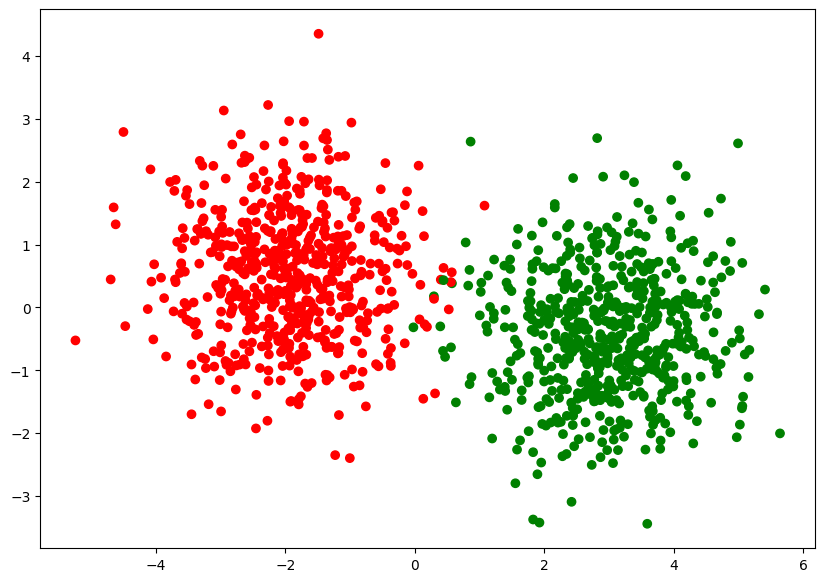

In [25]:
# отрисовываем точки на плоскости, покрасив их в два цвета в зависимости от класса
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [26]:
# разбиваем данные
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)

In [27]:
X_train

array([[ 4.19663149, -1.1097829 ],
       [-1.61980215,  1.11058575],
       [ 1.95519081, -2.46635659],
       ...,
       [-0.54885639,  1.45927083],
       [ 1.6331213 , -0.7247654 ],
       [ 3.56091945, -0.79548032]])

In [28]:
y_train[:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1000, 2), (1000,), (200, 2), (200,))

Давайте зададим нейронную сеть с двумя слоями. Пусть в скрытых слоях будет пять нейронов. В качестве функции активации выберем сигмоиду.

Нейросеть задается в виде класса, который наследуется от абстрактного класса Module. Для задания нейросети достаточно определить у класса методы `__init__ `и `__forward__`. В методе `__init__ ` обычно прописываются слои и артибуты сети, а в `__forward__` — то, как нейросеть будет обрабатывать данные, поданные ей на вход.

In [30]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 5)
        self.act1 = nn.Sigmoid()

        self.fc2 = nn.Linear(5, 1)
        self.act2 = nn.Sigmoid()

    def forward(self, x):
        """
        Задаем граф вычисления нейросети.
        params:
            x (torch.Tensor): данные, поданные на вход сети
        """

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)

        return x

Заведем нейросеть:

In [31]:
model = Net()

Посмотрим, что умеет наша необученная нейросеть. Получим ее ответы на тестовой выборке и визуализируем, к какому классу наша нейросеть отнесла какие точки тестовой выборки.

In [32]:
# model.forward(torch.FloatTensor(X_test))
nn_prediction = model(torch.FloatTensor(X_test))
nn_prediction = nn_prediction.tolist()

In [33]:
nn_prediction[:5]

[[0.45495855808258057],
 [0.4551892578601837],
 [0.4522879421710968],
 [0.43868356943130493],
 [0.4607833921909332]]

Переведем предсказания сети из вероятностей в формат нулей и единиц:

In [34]:
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

In [35]:
nn_prediction[:5]

array([0, 0, 0, 0, 0])

Визуализируем точки тестовой выборки и покрасим их в цвета в зависимости от того, к какому классу сеть отнесла эти точки:

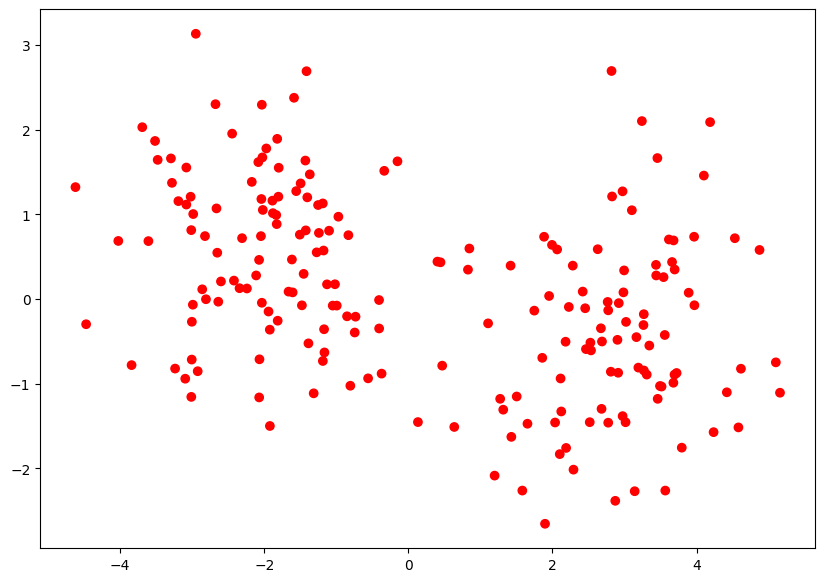

In [36]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

Полученный результат ожидаем, поскольку наша нейронная сеть не обучена. Давайте обучим её.


### Обучение нейронной сети в Pytorch

В одном из прошлых знаятий для обучения самописной логрегрессии нам нужно было реализовывать внутри класса логрегрессии методы для вычисления градиента лосс-функции по весам модели и обновления весов этой модели.

При написании класса сети в PyTorch нам ну нужно самостоятельно реализовывать вычисление производных и код обновления весов. Внутри PyTorch алгоритм вычисления частных производных лосс-функции по весам сети реализован с помощью модуля [autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html). На основе строения функции сети, заданной в forward, autograd понимает, как выглядит граф вычислений сети, и при вызове метода backward у последнего элемента графа (лосс-функции), проходит по графу в обратном направлении, вычисляя все градиенты.

Более подробно про то, как autograd вычисляет градиенты весов сети, вы найдете в дополнительных материалах к этому модулю.

А мы перейдем к написанию функции `train` для обучения нашей нейронной сети.

**В обучении сети участвуют следующие сущности:**
- сама нейросеть
- лосс-функция
- оптимизатор (optimizer)

**Что такое оптимизатор:**

Оптимизатор — это сущность, которая отвечает за обновление параметров сети на основе их текущих значений и значений их производных. То есть, в алгоритме стохастического спуска оптимизатор отвечает за строчку, обведенную красным:

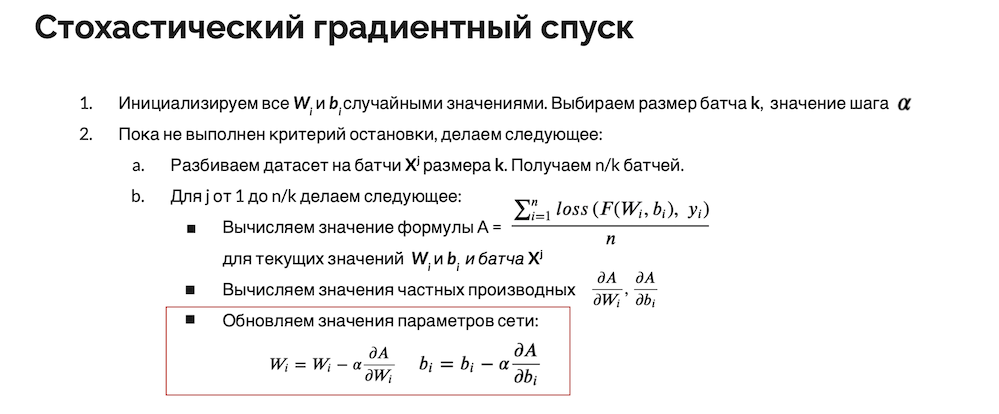

<a href="https://drive.google.com/uc?id=1ObjC6TVqRvMzspeWHqrIAZ-JpsjPaDMt">Image link</a>
<!-- <img src='https://drive.google.com/uc?id=1ObjC6TVqRvMzspeWHqrIAZ-JpsjPaDMt'/> -->
<!-- <img src="./img/sgd.png"/> -->

При вызове метода .backward() лосс-функции для всех весов сети вычисляются производные. После этого оптимизатор обновляет все веса сети с помощью этих вычисленных производных.

Тут может возникнуть вопрос: зачем нужна отдельная сущность "оптимизатор" для такой простой операции обновления весов? Казалось бы, всего-то нужно для каждого параметра сети отнять от его старого значения значение его производной, умноженной на learning rate. Почему бы не делать это сразу во время backward, во время того, как autograd вычисляет производные?

Ответ тут такой: существуют разные алгоритмы обновления весов сети, т.е. разные алгоритмы оптимизации весов. Стохастический градиентный спуск — это базовый, самый простой вариант. К нему можно добавить некоторые трюки, которые сделают обучение сети еще эффективнее. И чтобы можно было обучать одну и ту же сеть с помощью разных алгоритмов оптимизации, за алгоритм оптимизации отвечает отдельная сущность — optimizer.

Примеры оптимизаторов: **SGD**, **Adam**, **RMSprop**, **Adagrad**

Итак, теперь мы готовы реализовать функцию обучения сети. Реализуем для начала обычный градиентный спуск:

In [37]:
import tqdm
from tqdm.auto import tqdm

In [38]:
def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    Train на всех данных без разделения на батчи
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''

    # цикл эпох обучения
    for t in tqdm(range(num_epoch)):
        # Вычислим предсказания модели, `forward` - на выходе тензор (граф)
        y_pred = model(X)

        # Считаем значения ФУНКЦИИ ПОТЕРЬ
        loss = criterion(y_pred, y)

        # ========= ОПТИМИЗАЦИЯ =========
        # Подсчет градиентов с помощью autograd в функции потерь
        # В все потери запишутся в параметры (веса) модели
        loss.backward()
        # Оптимизатор, должен изменить веса после того как в модели подсчитаны
        # градиенты. Делаем шаг градиентного спуска (меняем веса модели).
        optimizer.step()
        # Чтобы не учитывать только что подсчитанные градиенты в следующем шаге,
        # обнуляем текущие. Так оптимизатор будет делать шаг, только на свежих
        # градиентах
        optimizer.zero_grad()
    return model

Снова объявим нашу сеть:

In [39]:
model = Net()

Объявим лосс-функцию и оптимизатор, и обучим сеть на 30 эпохах:

In [40]:
# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) - в целом считается
# самым эффективным

In [41]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1) # size [1000] -> [1000, 1]

In [42]:
model = train(model, X_train, y_train, criterion, optimizer, 150)

  0%|          | 0/150 [00:00<?, ?it/s]

Посмотрим теперь, каков будет результат.

In [43]:
with torch.no_grad():
    nn_prediction = model(torch.FloatTensor(X_test))
    nn_prediction = nn_prediction.tolist()

nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

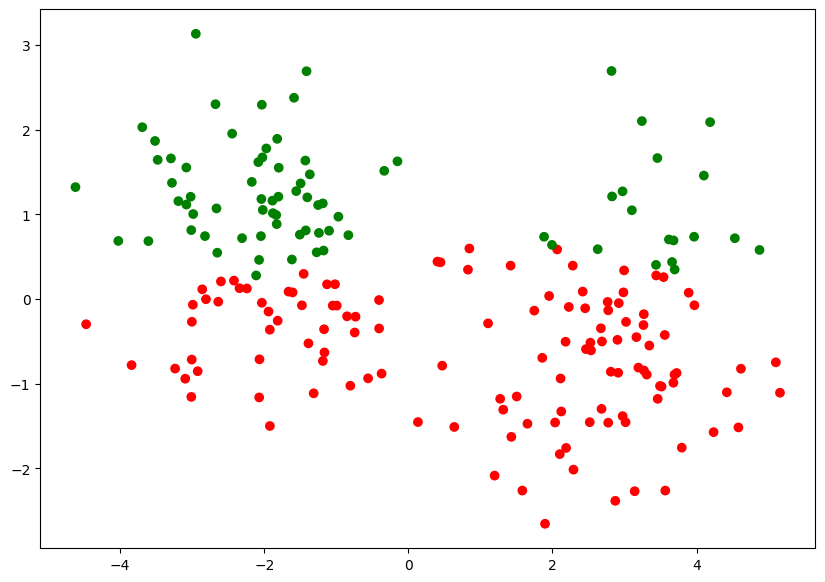

In [44]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

Покрасим все точки плоскости в цвета в зависимости от того, в какой класс наша сеть отнесла бы эти точки. Так мы лучше увидим разделяющую поверхность:

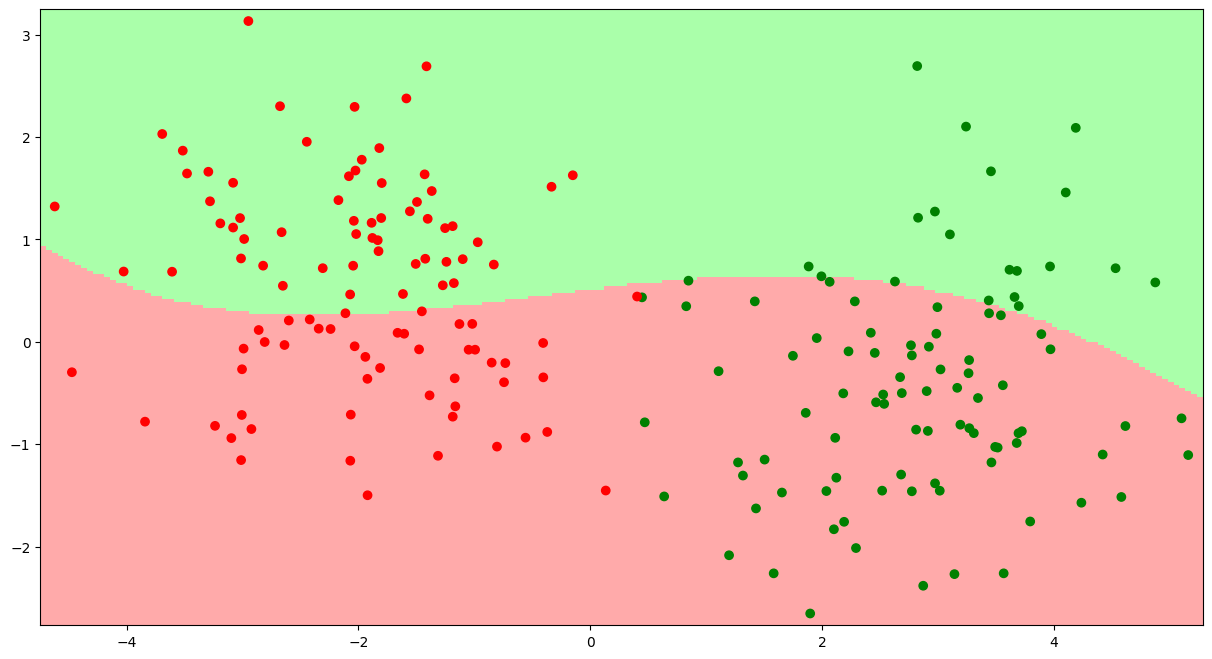

In [45]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))
Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

### Dataloader и обучение по мини-батчам

В домашнем задании по логрегрессии мы сами писали функцию generate_batches, которая выполняла функционал разделения данных на мини-батчи для подачи в сеть. В PyTorch нам такого самим писать не нужно, тут уже есть специальный класс Dataloader. Давайте заведем даталоадеры для тренировочных и тестовых данных.

Даталоадер принимает на вход данные в виде массива пар [($x_1$, $y_1$), ..., ($x_i$, $y_i$), ...]

In [46]:
from torch.utils.data import DataLoader

In [47]:
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
test_loader = DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=False)

Здесь:
- batch_size — размер батча, на которые даталоадер будет делить данные перед каждой эпохой;
- shuffle — если True, то перед каждой эпохой и делением на батчи данные будут перемешаны. Shuffle обычно ставится True для обучающих данных, и False для тестовых.

Нам нужно также немного изменить функцию обучения сети, чтобы реализовать обучение по мини-батчам:

In [48]:
def train_stochastic(model, loader, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # цикл по батчам даталоадера
        for X_batch, y_batch in loader:
            # Вычислим предсказания нашей модели
            y_pred = model(X_batch)

            # Посчитаем значение функции потерь  на полученном предсказании
            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())

            # Выполним подсчёт новых градиентов
            loss.backward()
            # Выполним шаг градиентного спуска
            optimizer.step()
            # Обнулим сохраненные у оптимизатора значения градиентов
            # перед следующим шагом обучения
            optimizer.zero_grad()

        print("curr_loss", np.mean(epoch_loss))

    return model

Снова заведем сеть, лосс-функцию, оптимизатор, и начнем обучение:

In [49]:
model = Net()

# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(NN.parameters(), lr=1e-4)

In [50]:
model = train_stochastic(model, train_loader, criterion, optimizer, 350)

  0%|          | 0/350 [00:00<?, ?it/s]

curr_loss 0.7708092592656612
curr_loss 0.7664540000259876
curr_loss 0.764530211687088
curr_loss 0.7594362869858742
curr_loss 0.757980715483427
curr_loss 0.7551137506961823
curr_loss 0.751278031617403
curr_loss 0.7519082017242908
curr_loss 0.7481654360890388
curr_loss 0.7452921345829964
curr_loss 0.7413593009114265
curr_loss 0.7413986697793007
curr_loss 0.7378981374204159
curr_loss 0.7354476861655712
curr_loss 0.7331508025527
curr_loss 0.7315110005438328
curr_loss 0.7292168475687504
curr_loss 0.72609031945467
curr_loss 0.7231821790337563
curr_loss 0.7209290899336338
curr_loss 0.7193635664880276
curr_loss 0.7168024443089962
curr_loss 0.7132360860705376
curr_loss 0.7107939906418324
curr_loss 0.7093475088477135
curr_loss 0.7075149901211262
curr_loss 0.7075443305075169
curr_loss 0.7036095969378948
curr_loss 0.7014761306345463
curr_loss 0.7012458704411983
curr_loss 0.6982195526361465
curr_loss 0.6949745528399944
curr_loss 0.6949525289237499
curr_loss 0.6927407458424568
curr_loss 0.6893299445

Посмотрим, как теперь наша модель делит плоскость на части по классам:

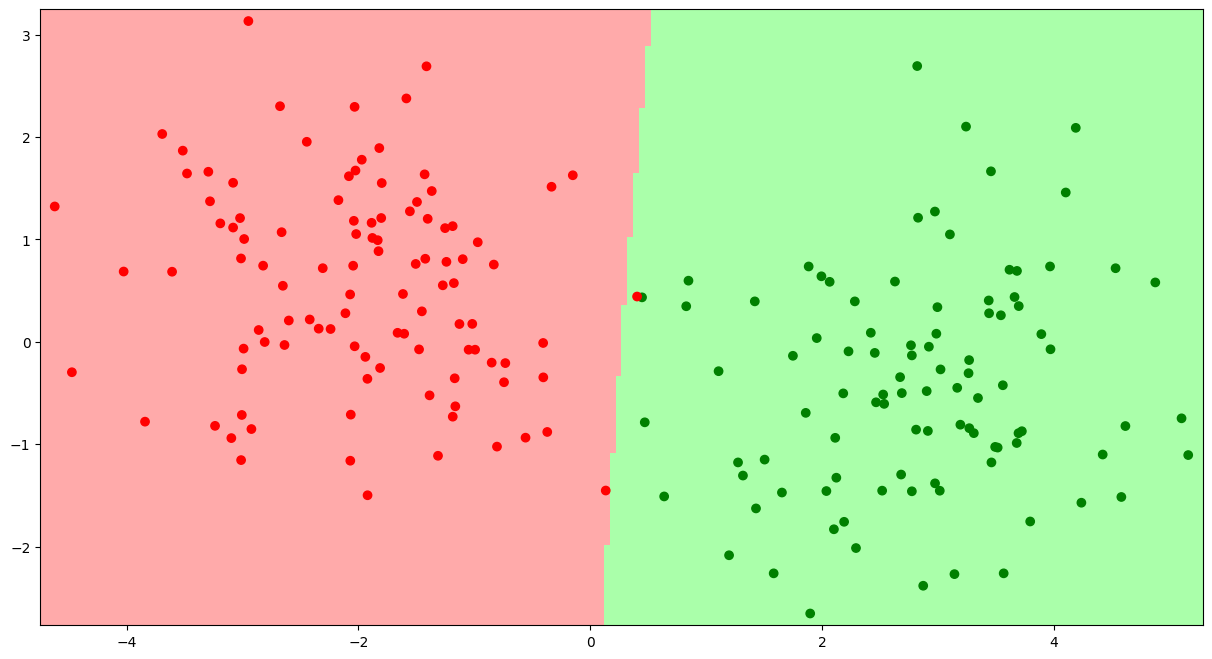

In [51]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))

Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

## nn.Sequential

Давайте еще раз посмотрим на то, как мы задавали нашу нейросеть:

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 5)
        self.act1 = nn.Sigmoid()

        self.fc2 = nn.Linear(5, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

В PyTorch есть еще один способ задания структуры нейросети, через nn.Sequential. Выглядит это так:

In [53]:
model = nn.Sequential(
                   nn.Linear(2, 5, bias=True),
                   nn.Sigmoid(),
                   nn.Linear(5, 1, bias=True),
                   nn.Sigmoid()
                   )

Теперь с переменной model можно обращаться точно так же, как мы делали это выше. Эту сеть можно обучить и получать ответы на тестовых данных.



Этот способ создания сети выглядит проще (не нужно писать никакой класс и никакой forward), но он менее гибок. Дело в том, что, используя nn.Sequential, мы задаем только слои сети, и выполняться они будут при вызове сети ровно в том порядке, в котором мы их задали. Отсюда и название структуры Sequential — "последовательный". В случае же описания сети в виде класса мы могли в forward определять вид прохождения входа по сети сами. Например, могли бы сделать такую нейросеть:

In [54]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc11 = nn.Linear(2, 2)
        self.act11 = nn.Sigmoid()

        self.fc12 = nn.Linear(2, 2)
        self.act12 = nn.Sigmoid()

        self.fc2 = nn.Linear(4, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x1, x2):

        x1 = self.fc11(x1)
        x1 = self.act11(x1)

        x2 = self.fc12(x2)
        x2 = self.act12(x2)

        x = torch.cat([x1, x2], dim=1)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Или можно даже делать так:

In [55]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc11 = nn.Linear(2, 2)
        self.act11 = nn.Sigmoid()

        self.fc12 = nn.Linear(2, 2)
        self.act12 = nn.Sigmoid()

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x, mode='left'):

        if mode == 'left':
            x = self.fc11(x)
            x = self.act11(x)

        elif mode == 'right':
            x = self.fc12(x2)
            x = self.act12(x2)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Таким образом, при задании сети в виде класса у нас ест бОльшая гибкость в определении того, как сеть будет обрабатывать входные данные на каждой новой итерации.


Но, несмотря на это, nn.Sequential все-таки используется при создании сетей. Он часто используется внутри метода __init__, чтобы сгруппировать несколько слоев сети в блок. Например, вот так:

In [56]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.left_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )

        self.right_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )

        self.bottom_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )


    def forward(self, x, mode='left'):

        if mode == 'left':
            x = self.left_block(x)

        elif mode == 'right':
            x = self.right_block(x)

        x = self.bottom_block(x)
        return x

Это становится особенно удобно при написании глубоких сетей, у которых много слоев.

## Полезные ссылки

- [Datasets & Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) (PyTorch docs)
- [Torch.autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) (PyTorch docs)